# Running Window alpha component

## Nocodazole Treatment

In [9]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [10]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6

In [11]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [12]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [19]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '-Noco')
df_condition2 = load_and_label_files(csv_files_2, '+Noco, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+Noco, 60 mins')

In [20]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [21]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes'] > mean_step_sizes_threshold]

In [22]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

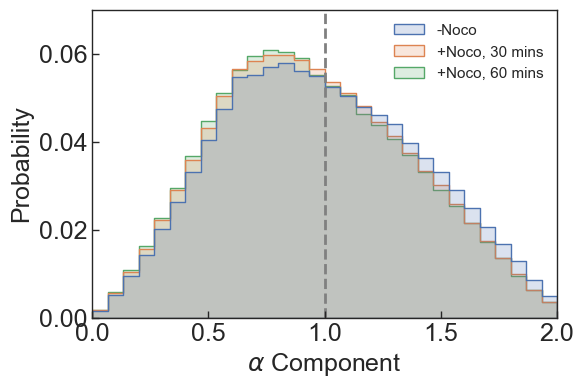

In [23]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6,4))
ax = sns.histplot(
    data=final_filtered_df,
    x='alpha',
    hue='Condition',
    bins=30,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)
plt.axvline(1, ls="--", c="gray", lw=2)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlim(0, 2)
plt.ylim(0, 0.07)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

## LatrunculinA Treatment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [4]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'No drug_2x')
df_condition2 = load_and_label_files(csv_files_2, 'LatrunculinA_30 mins')
df_condition3 = load_and_label_files(csv_files_3, 'LatrunculinA_60 mins')

In [5]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

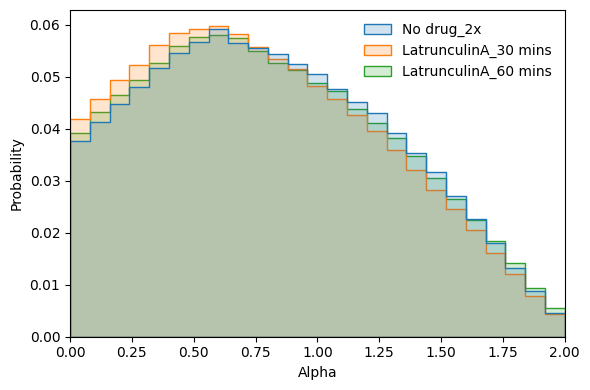

In [6]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=df_combined,
    x='alpha',
    hue='Condition',
    bins=25,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlabel('Alpha')
plt.ylabel('Probability')
plt.xlim(0, 2) 
plt.tight_layout()
plt.show()

## Single Condition

In [3]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [4]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

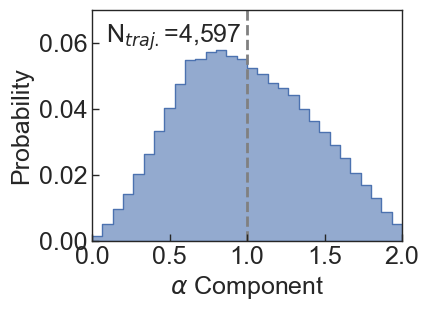

In [22]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6



df_list = []


for file in csv_files:

    df = pd.read_csv(file)
    trackID_prefix = os.path.splitext(os.path.basename(file))[0]
    df["unique_trackID"] = (
        df["trackID"].astype(str).apply(lambda x: f"{trackID_prefix}_{x}")
    )

    df_list.append(df)


combined_df = pd.concat(df_list, ignore_index=True)

filtered_by_step_size = combined_df[
    (combined_df["mean_step_sizes"] > mean_step_sizes_threshold)
]

valid_track_ids = filtered_by_step_size['unique_trackID'].unique()

final_filtered_df = combined_df[
    (combined_df["unique_trackID"].isin(valid_track_ids)) &
    (combined_df["R2"] > R2_threshold)
]




plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=final_filtered_df,
    x="alpha",

    bins=30,

    binrange=(0, 2),

    stat="probability",
    element="step",

    common_norm=False,

    fill=True,

    alpha=0.6,

)

plt.axvline(1, ls="--", c="gray", lw=2)
n_traj = final_filtered_df["unique_trackID"].nunique()
plt.text(
    0.09,
    0.06,
    r"N$_{traj.}$=" + f"{n_traj:,}",
    fontdict={"fontsize": 18},
)


plt.xlim(0, 2)
plt.ylim(0, 0.07)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

In [15]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [16]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

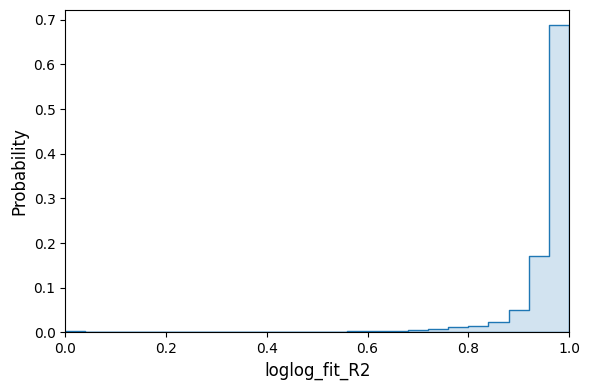

In [17]:

df_list = []

for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)


# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=combined_df,
    x='loglog_fit_R2',
    bins=25,
    binrange = (0,1),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

plt.xlabel('loglog_fit_R2', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.xlim(0, 1) 
plt.tight_layout()
plt.show()